<a href="https://colab.research.google.com/github/RadnuST/AIML/blob/main/Reddit_Califonia_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: CONNECT DRIVE

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
import nltk
nltk.data.path.append('/content/drive/MyDrive/AIML files/Reddit Califonia/data_01.csv')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/data_01.csv"
df = pd.read_csv(file_path)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Check if 'body' column exists
if 'body' in df.columns:
    # Apply VADER to the 'body' column
    df['sentiment_scores'] = df['body'].astype(str).apply(sia.polarity_scores)

    # Extract individual sentiment components
    df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
    df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
    df['neutral'] = df['sentiment_scores'].apply(lambda x: x['neu'])
    df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])

    # Save output to CSV
    output_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"
    df[['body', 'compound', 'positive', 'neutral', 'negative']].to_csv(output_path, index=False)
    print(f"Output saved to {output_path}")
else:
    print("The 'body' column is missing in the uploaded file.")


Output saved to /content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv


In [ ]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [5]:
import pandas as pd
from transformers import pipeline

# Load sentiment analysis pipeline (using a pre-trained model)
sentiment_pipeline = pipeline("sentiment-analysis")

# Load the CSV file
file_path = "/content/data_01.csv"  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Extract relevant text columns (body for posts & comments)
text_columns = ["body", "title"]
df["text"] = df[text_columns].fillna("").agg(" ".join, axis=1)  # Combine text fields

# Perform sentiment analysis
df["sentiment"] = df["text"].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'] if x.strip() else "NEUTRAL")
df["sentiment_score"] = df["text"].apply(lambda x: sentiment_pipeline(x[:512])[0]['score'] if x.strip() else 0.0)

# Save the results to a new CSV file
output_file = "sentiment_analysis_results.csv"
df.to_csv(output_file, index=False)

print(f"Sentiment analysis completed! Results saved to: {output_file}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


KeyboardInterrupt: 

In [7]:
# prompt: df.colum

df.columns


Index(['body', 'dataType', 'imageUrls/0', 'link', 'numberOfComments', 'title',
       'url', 'sentiment_scores', 'compound', 'positive', 'neutral',
       'negative'],
      dtype='object')

In [9]:
# prompt: drop all colums other than body	compound	positive	neutral	negative

import pandas as pd

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Assuming the output from the previous code
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]




In [10]:
df.head()

,body,compound,positive,neutral,negative
0,"Location 39°45'27""N 121°37'22""W\n\nThe 2018 Ca...",-0.9790,0.061,0.712,0.227
1,My ex friend's boyfriend's grandmother died in...,-0.4215,0.177,0.573,0.250
2,I'm so sorry to hear that. May they rest in pe...,0.4417,0.248,0.639,0.113
3,I remember hearing those reports. People tryin...,-0.5719,0.077,0.724,0.199
4,Lost mine and all my friends and families home...,-0.1531,0.097,0.755,0.148


In [11]:
import pandas as pd

def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)



In [12]:
df.head()

,body,compound,positive,neutral,negative,Compound category
0,"Location 39°45'27""N 121°37'22""W\n\nThe 2018 Ca...",-0.9790,0.061,0.712,0.227,Negative
1,My ex friend's boyfriend's grandmother died in...,-0.4215,0.177,0.573,0.250,Negative
2,I'm so sorry to hear that. May they rest in pe...,0.4417,0.248,0.639,0.113,Positive
3,I remember hearing those reports. People tryin...,-0.5719,0.077,0.724,0.199,Negative
4,Lost mine and all my friends and families home...,-0.1531,0.097,0.755,0.148,Negative


In [13]:
df.shape

(8849, 6)

In [14]:
# prompt: check for null

# Check for null values in specific columns
null_counts = df.isnull().sum()
print(null_counts)

# Or check for null values in the entire DataFrame
print(df.isnull().values.any())


body                 14
compound              0
positive              0
neutral               0
negative              0
Compound category     0
dtype: int64
True


In [16]:
# prompt: remove null

import pandas as pd
# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Assuming the output from the previous code
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

df.head()

# Check for null values again to verify removal
print(df.isnull().sum())
print(df.isnull().values.any())


body                 0
compound             0
positive             0
neutral              0
negative             0
Compound category    0
dtype: int64
False


In [17]:
df.shape

(8835, 6)

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Assuming the output from the previous code
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)
# Tokenizing the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=500000)  # Adjust max_features if needed
X = vectorizer.fit_transform(df['body'])

# Encoding target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})  # Convert categories to numbers

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training the logistic regression model
model_logistic = LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear')
model_logistic.fit(X_train, y_train)

# Predictions
y_pred = model_logistic.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7209960384833051

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73       685
           1       0.76      0.74      0.75       628
           2       0.67      0.69      0.68       454

    accuracy                           0.72      1767
   macro avg       0.72      0.72      0.72      1767
weighted avg       0.72      0.72      0.72      1767



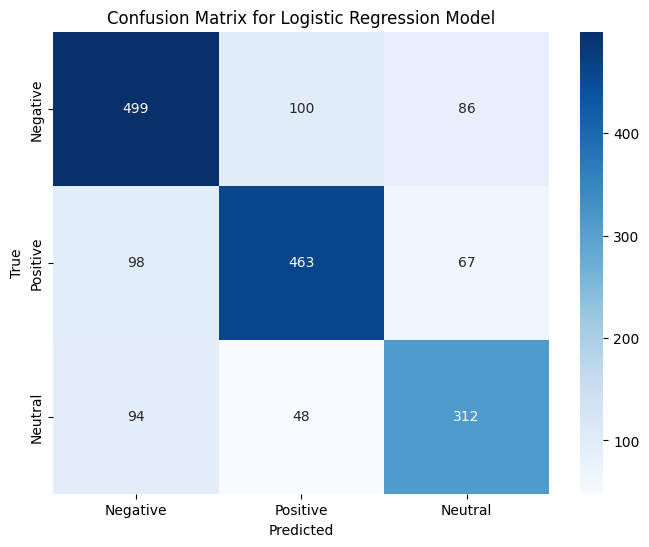

In [31]:
# prompt: confusion matrix for model_logistic

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from the previous code

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Assuming the output from the previous code
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500000)
X = vectorizer.fit_transform(df['body'])  # Convert text to numerical features

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

# Print results
print(f"\nSVM Model Accuracy: {svm_accuracy:.4f}")
print("\nClassification Report for SVM:\n", svm_report)


SVM Model Accuracy: 0.7080

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       685
           1       0.74      0.72      0.73       628
           2       0.63      0.69      0.66       454

    accuracy                           0.71      1767
   macro avg       0.70      0.71      0.70      1767
weighted avg       0.71      0.71      0.71      1767



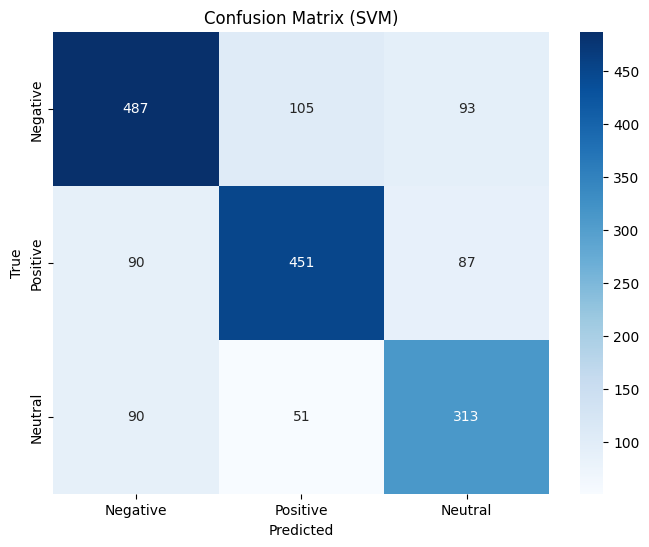

In [24]:
# prompt: confusion matrix for svm_model

import matplotlib.pyplot as plt
# Create the confusion matrix for the SVM model
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (SVM)")
plt.show()


In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Use your dataset path
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500000)
X = vectorizer.fit_transform(df['body'])  # Convert text to numerical features

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

# Print results
print(f"\nDecision Tree Model Accuracy: {dt_accuracy:.4f}")
print("\nClassification Report for Decision Tree:\n", dt_report)


Decision Tree Model Accuracy: 0.6723

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65       685
           1       0.68      0.68      0.68       628
           2       0.65      0.74      0.69       454

    accuracy                           0.67      1767
   macro avg       0.67      0.68      0.67      1767
weighted avg       0.67      0.67      0.67      1767



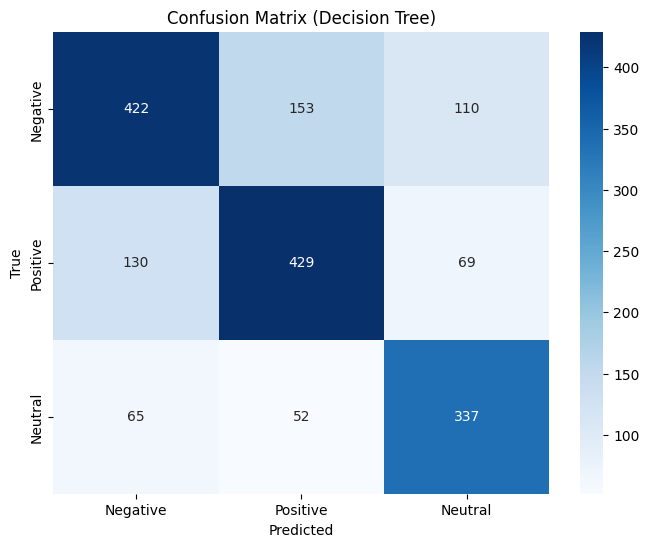

In [26]:
# prompt: confusion matrix for dt_model

import matplotlib.pyplot as plt
# Create the confusion matrix for the Decision Tree model
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()


In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Use your dataset path
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500000)
X = vectorizer.fit_transform(df['body'])  # Convert text to numerical features

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

# Print results
print(f"\nRandom Forest Model Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report for Random Forest:\n", rf_report)


Random Forest Model Accuracy: 0.7153

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70       685
           1       0.77      0.67      0.71       628
           2       0.67      0.81      0.73       454

    accuracy                           0.72      1767
   macro avg       0.72      0.72      0.72      1767
weighted avg       0.72      0.72      0.71      1767



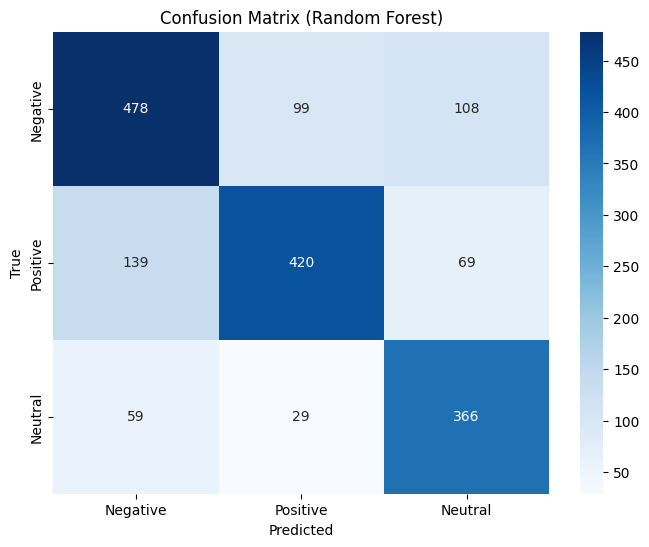

In [28]:
# prompt: confusion matrix for rf_model

import matplotlib.pyplot as plt
# Create the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Random Forest)")
plt.show()


In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.49122807017543857

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.60      0.54       685
           1       0.46      0.46      0.46       628
           2       0.55      0.37      0.44       454

    accuracy                           0.49      1767
   macro avg       0.50      0.48      0.48      1767
weighted avg       0.50      0.49      0.49      1767



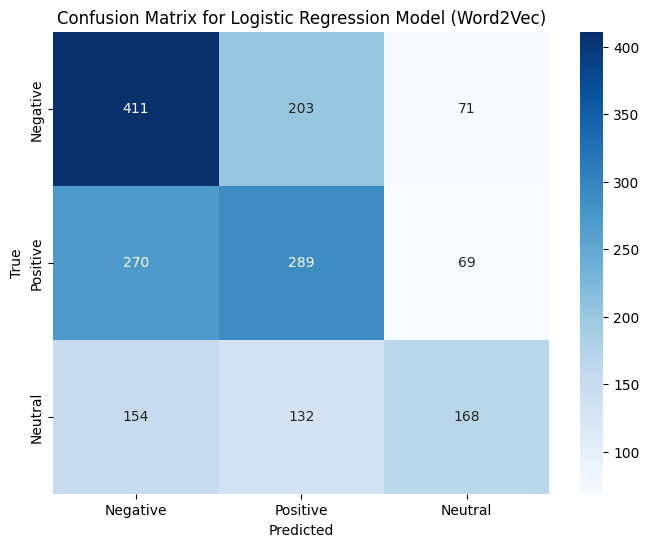

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string

# Ensure nltk tokenization resources are available
nltk.download('punkt')

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for Word2Vec
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_body'], vector_size=100, window=5, min_count=2, workers=4)

# Function to get sentence vectors (average of word vectors)
def get_sentence_vector(words, model, vector_size=100):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors
X = np.array([get_sentence_vector(words, word2vec_model) for words in df['tokenized_body']])

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Logistic Regression model
model_logistic1 = LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear')
model_logistic1.fit(X_train, y_train)

# Make predictions
y_pred = model_logistic1.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Assuming y_test and y_pred are already defined from the previous code

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression Model (Word2Vec)")
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.48613469156762873

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.60      0.53       685
           1       0.44      0.50      0.47       628
           2       0.63      0.30      0.41       454

    accuracy                           0.49      1767
   macro avg       0.52      0.47      0.47      1767
weighted avg       0.51      0.49      0.48      1767



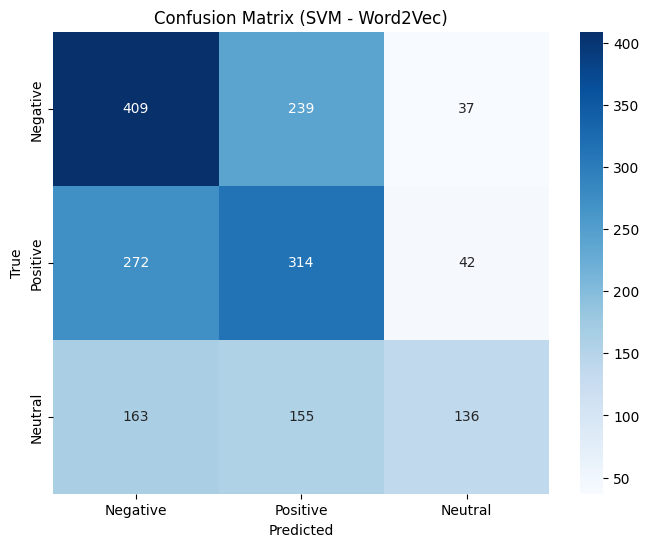

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string

# Ensure nltk tokenization resources are available
nltk.download('punkt')

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for Word2Vec
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_body'], vector_size=100, window=5, min_count=2, workers=4)

# Function to get sentence vectors (average of word vectors)
def get_sentence_vector(words, model, vector_size=100):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors
X = np.array([get_sentence_vector(words, word2vec_model) for words in df['tokenized_body']])

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Create the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (SVM - Word2Vec)")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.4816072439162422

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50       685
           1       0.45      0.45      0.45       628
           2       0.50      0.50      0.50       454

    accuracy                           0.48      1767
   macro avg       0.48      0.48      0.48      1767
weighted avg       0.48      0.48      0.48      1767



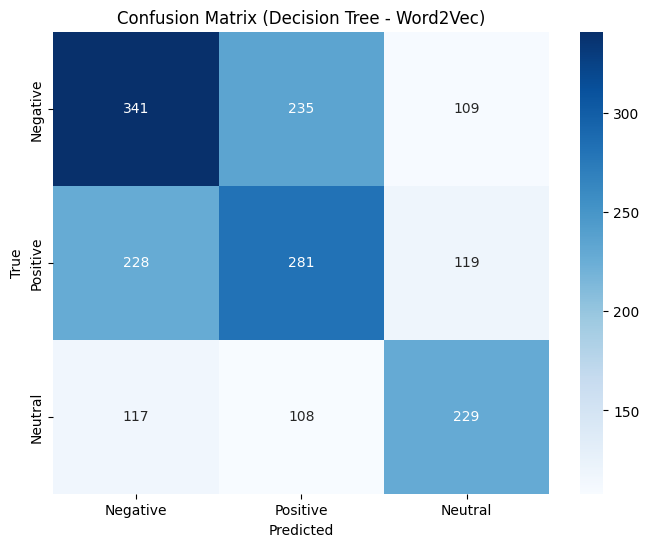

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string

# Ensure nltk tokenization resources are available
nltk.download('punkt')

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for Word2Vec
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_body'], vector_size=100, window=5, min_count=2, workers=4)

# Function to get sentence vectors (average of word vectors)
def get_sentence_vector(words, model, vector_size=100):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors
X = np.array([get_sentence_vector(words, word2vec_model) for words in df['tokenized_body']])

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Create the confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Decision Tree - Word2Vec)")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.5398981324278438

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.63      0.58       685
           1       0.49      0.47      0.48       628
           2       0.64      0.49      0.55       454

    accuracy                           0.54      1767
   macro avg       0.55      0.53      0.54      1767
weighted avg       0.55      0.54      0.54      1767



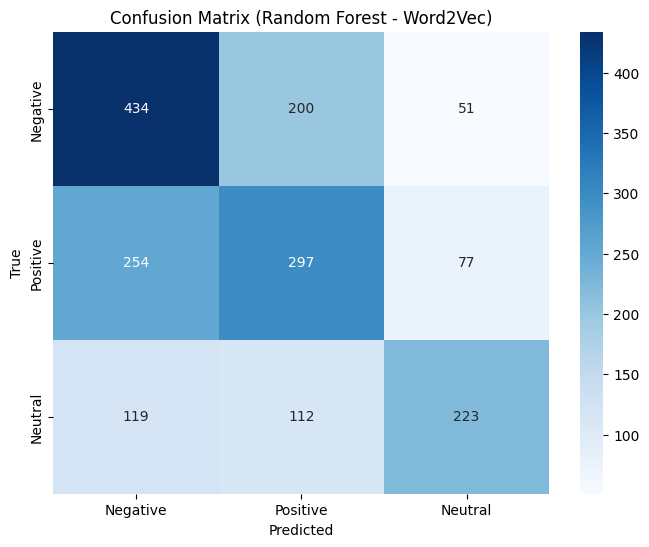

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure nltk tokenization resources are available
nltk.download('punkt')

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for Word2Vec
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_body'], vector_size=100, window=5, min_count=2, workers=4)

# Function to get sentence vectors (average of word vectors)
def get_sentence_vector(words, model, vector_size=100):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors
X = np.array([get_sentence_vector(words, word2vec_model) for words in df['tokenized_body']])

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Create the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Random Forest - Word2Vec)")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


--2025-03-03 05:15:01--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-03 05:15:01--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-03 05:15:01--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

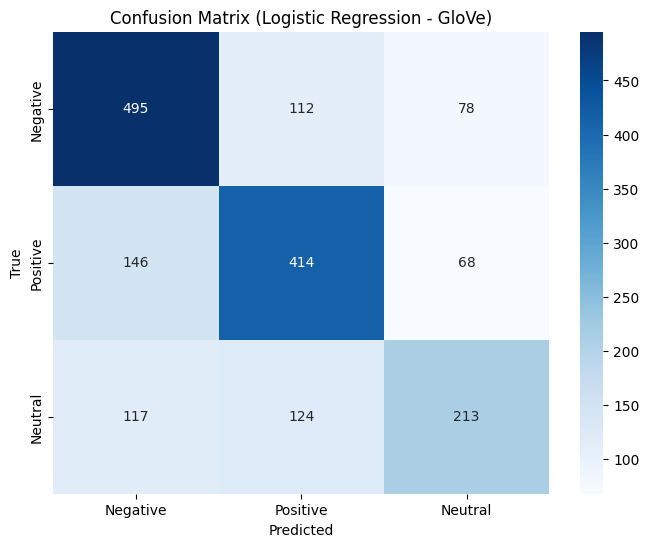

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
import string

# Ensure nltk tokenization resources are available
nltk.download('punkt')

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for Word2Vec
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Download and load GloVe embeddings (50D, 100D, or 300D)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

# Load the GloVe model
def load_glove_model(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load the 100D GloVe embeddings
glove_path = "glove.6B.100d.txt"  # Change to 50d or 300d if needed
glove_embeddings = load_glove_model(glove_path)

# Function to get sentence vector by averaging word vectors
def get_sentence_vector(words, embeddings, vector_size=100):
    vectors = [embeddings[word] for word in words if word in embeddings]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors using GloVe
X = np.array([get_sentence_vector(words, glove_embeddings) for words in df['tokenized_body']])

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear')
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_glove = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Accuracy:", accuracy_score(y_test, y_pred_glove))
print("\nClassification Report:\n", classification_report(y_test, y_pred_glove))

# Create the confusion matrix for Logistic Regression
cm_glove = confusion_matrix(y_test, y_pred_glove)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_glove, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Logistic Regression - GloVe)")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


--2025-03-03 05:20:26--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-03 05:20:26--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-03 05:20:26--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

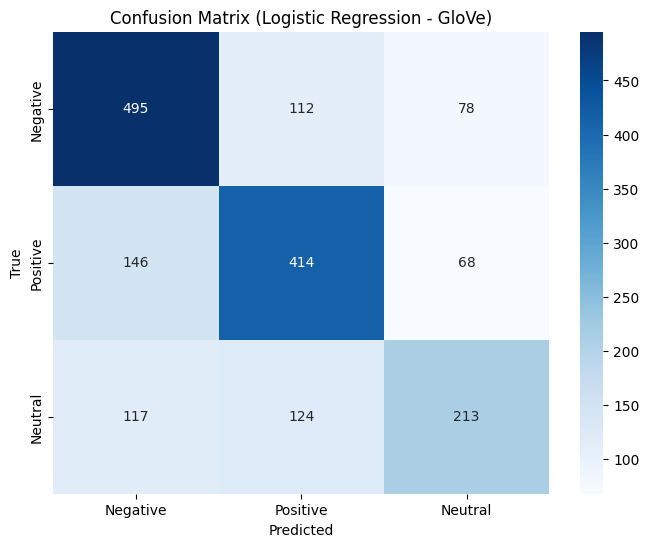

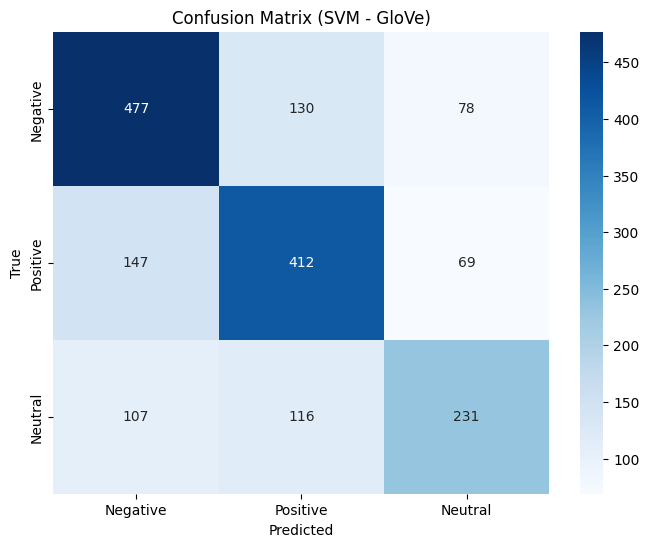

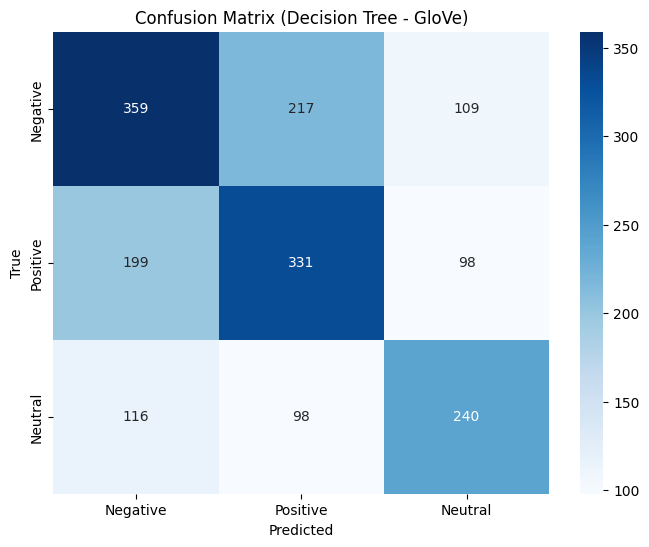

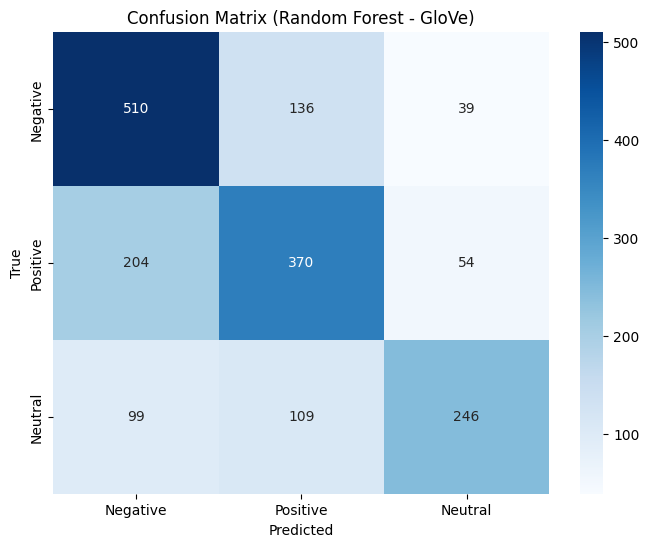

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
import string

# Ensure nltk tokenization resources are available
nltk.download('punkt')

# Load the data file
file_path = "/content/drive/MyDrive/AIML files/Reddit Califonia/vader_sentiment_analysis.csv"  # Adjust path as needed
df = pd.read_csv(file_path)

# Select only the desired columns
df = df[['body', 'compound', 'positive', 'neutral', 'negative']]

# Remove rows with null values in any of the selected columns
df = df.dropna()

# Function to categorize compound sentiment scores
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column
df['Compound category'] = df['compound'].apply(categorize_compound)

# Tokenize the text data for GloVe
def preprocess_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    try:
        return word_tokenize(text)  # Try using NLTK tokenizer
    except LookupError:
        return text.split()  # Fallback: simple split by space

df['tokenized_body'] = df['body'].apply(preprocess_text)

# Download and load GloVe embeddings (100D)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

# Load the GloVe model
def load_glove_model(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load the 100D GloVe embeddings
glove_path = "glove.6B.100d.txt"  # Change to 50d or 300d if needed
glove_embeddings = load_glove_model(glove_path)

# Function to get sentence vector by averaging word vectors
def get_sentence_vector(words, embeddings, vector_size=100):
    vectors = [embeddings[word] for word in words if word in embeddings]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Convert text to numerical vectors using GloVe
X = np.array([get_sentence_vector(words, glove_embeddings) for words in df['tokenized_body']])

# Encode the target variable
y = df['Compound category'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear'),
    "SVM": SVC(kernel='linear', class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

# Train and evaluate models
results = []
confusion_matrices = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Generate classification report
    report = classification_report(y_test, y_pred)
    print(f"\nClassification Report for {model_name}:\n{report}")

    # Store results
    results.append({"Model": model_name, "Accuracy": accuracy})

    # Store confusion matrix
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

# Convert results to DataFrame and display
df_results = pd.DataFrame(results)
print("\nModel Performance Comparison:\n", df_results)

# Plot confusion matrices
for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive', 'Neutral'],
                yticklabels=['Negative', 'Positive', 'Neutral'])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix ({model_name} - GloVe)")
    plt.show()